In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score


In [ ]:
df = pd.read_csv('HR_Employee_Data.csv')
df.head(10)

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,38%,53%,2,157,3,0,1,0,sales,low
1,IND28133,80%,86%,5,262,6,0,1,0,sales,medium
2,IND07164,11%,88%,7,272,4,0,1,0,sales,medium
3,IND30478,72%,87%,5,223,5,0,1,0,sales,low
4,IND24003,37%,52%,2,159,3,0,1,0,sales,low
5,IND08609,41%,50%,2,153,3,0,1,0,sales,low
6,IND14345,10%,77%,6,247,4,0,1,0,sales,low
7,IND16300,92%,85%,5,259,5,0,1,0,sales,low
8,IND27336,89%,100%,5,224,5,0,1,0,sales,low
9,IND41409,42%,53%,2,142,3,0,1,0,sales,low


# Menghapus kolom Emp_Id

In [ ]:
df = df.drop("Emp_Id", axis=1)

# Cek Missing Value

In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   satisfaction_level     14999 non-null  object
 1   last_evaluation        14999 non-null  object
 2   number_project         14999 non-null  int64 
 3   average_montly_hours   14999 non-null  int64 
 4   time_spend_company     14999 non-null  int64 
 5   Work_accident          14999 non-null  int64 
 6   left                   14999 non-null  int64 
 7   promotion_last_5years  14999 non-null  int64 
 8   Department             14999 non-null  object
 9   salary                 14999 non-null  object
dtypes: int64(6), object(4)
memory usage: 1.1+ MB


# Mengubah % menjadi desimal

In [ ]:
df['satisfaction_level'] = df['satisfaction_level'].str.rstrip('%').astype(float) / 100
df['last_evaluation'] = df['last_evaluation'].str.rstrip('%').astype(float) / 100

# Mengubah Kolom Department menjadi Numerik

In [ ]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df['Department'].replace(to_replace = 'sales', value = 1, inplace = True)
df['Department'].replace(to_replace = 'accounting', value = 2, inplace = True)
df['Department'].replace(to_replace = 'hr', value = 3, inplace = True)
df['Department'].replace(to_replace = 'technical', value = 4, inplace = True)
df['Department'].replace(to_replace = 'support', value = 5, inplace = True)
df['Department'].replace(to_replace = 'management', value = 6, inplace = True)
df['Department'].replace(to_replace = 'IT', value = 7, inplace = True)
df['Department'].replace(to_replace = 'product_mng', value = 8, inplace = True)
df['Department'].replace(to_replace = 'marketing', value = 9, inplace = True)
df['Department'].replace(to_replace = 'RandD', value = 10, inplace = True)
df.head()

# dummies=pd.get_dummies(df['Department'],prefix='Department')
# df=pd.concat([df,dummies],axis=1)
# df.drop(['Department'],axis=1,inplace=True)
# df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,1,low
1,0.80,0.86,5,262,6,0,1,0,1,medium
2,0.11,0.88,7,272,4,0,1,0,1,medium
3,0.72,0.87,5,223,5,0,1,0,1,low
4,0.37,0.52,2,159,3,0,1,0,1,low


# Mengubah kolom salary menjadi kategorikal

In [ ]:
# # Mengubah kolom Work_accident menjadi kategori
# df['Work_accident'] = df['Work_accident'].astype('category')

# # Mengubah kolom promotion_last_5years menjadi kategori
# df['promotion_last_5years'] = df['promotion_last_5years'].astype('category')

df['salary'] = df['salary'].apply(lambda s: 0 if s == 'low' else 1 if s == 'medium' else 2)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,1,1
2,0.11,0.88,7,272,4,0,1,0,1,1
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0


## Pengaruh Gaji terhadap tingkat kepuasan

<AxesSubplot: xlabel='Department'>

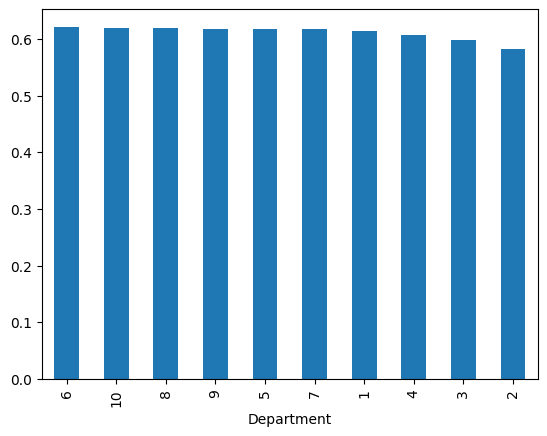

In [ ]:
ret=df[['Department', 'satisfaction_level']].groupby(['Department'], as_index=False).mean().sort_values(by='satisfaction_level', ascending=False)
ret.plot.bar(x="Department", y="satisfaction_level", legend=False )

In [ ]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
Department,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_10864\1218661183.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


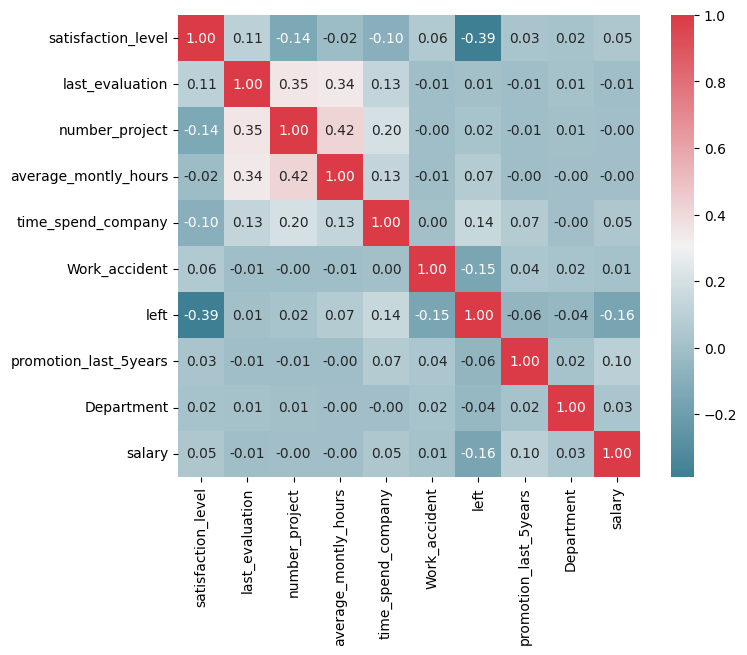

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
corr = df.corr()

# Tambahkan angka pada heatmap
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True, fmt=".2f")

plt.show()


## Pengaruh jumlah proyek terhadap jumlah jam kerja rata-rata per bulan.

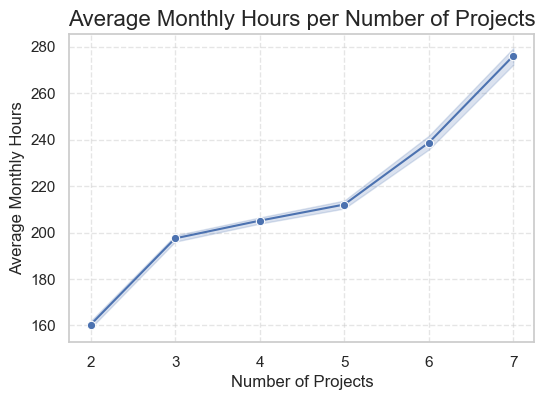

In [ ]:
# Menentukan gaya plot menggunakan seaborn
sns.set(style="whitegrid")

# Membuat plot
plt.figure(figsize=(6, 4))  # Mengatur ukuran gambar

# Memplot data
sns.lineplot(data=df, x='number_project', y='average_montly_hours', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Average Monthly Hours per Number of Projects', fontsize=16)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Average Monthly Hours', fontsize=12)

# Menambahkan garis grid
plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()


##  Pengaruh jumlah proyek terhadap hasil evaluasi terakhir

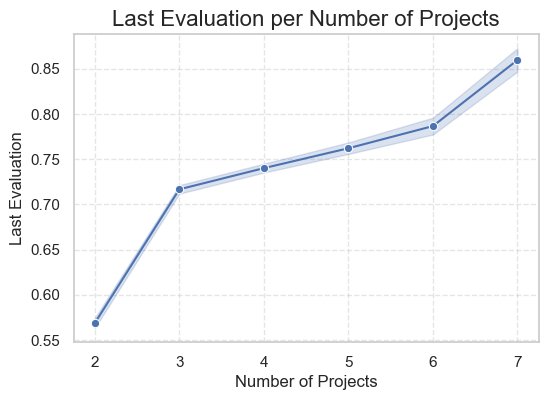

In [ ]:
# Menentukan gaya plot menggunakan seaborn
sns.set(style="whitegrid")

# Membuat plot
plt.figure(figsize=(6, 4))  # Mengatur ukuran gambar

# Memplot data
sns.lineplot(data=df, x='number_project', y='last_evaluation', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Last Evaluation per Number of Projects', fontsize=16)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Last Evaluation', fontsize=12)

# Menambahkan garis grid
plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan plot
plt.show()


In [ ]:
# X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
X = df.drop(['left'],axis=1)
y = df['left']

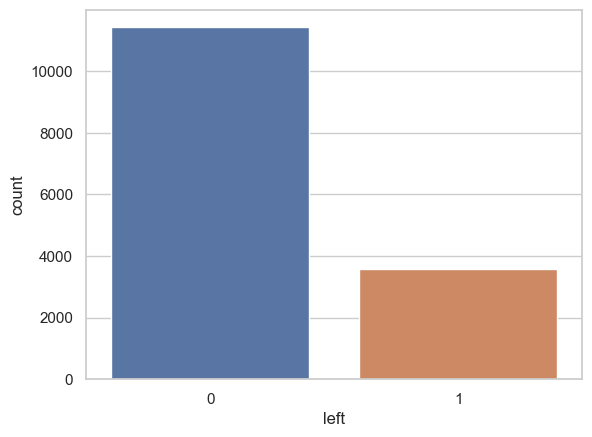

(14999, 10)

In [ ]:
# Visualize distribution of target variable
sns.countplot(x=y)
plt.show()
df.shape

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=73)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Sebelum SMOTE:", y.value_counts())
print("Setelah SMOTE:", y_resampled.value_counts())

Sebelum SMOTE: 0    11428
1     3571
Name: left, dtype: int64
Setelah SMOTE: 1    11428
0    11428
Name: left, dtype: int64


In [ ]:
y_resampled.shape

(22856,)

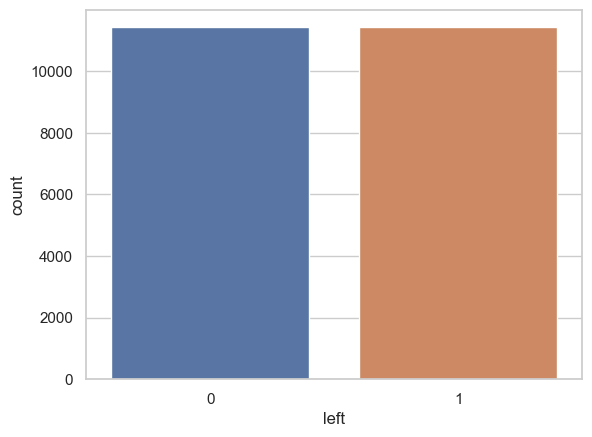

In [ ]:
# Visualize distribution of target variable
sns.countplot(x=y_resampled)
plt.show()

## Melatih Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=1, test_size = 0.3)

model = RandomForestClassifier(n_estimators=10, random_state=19)
model.fit(X_train, y_train)
labels_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, labels_predict)
precision = precision_score(y_test, labels_predict)
recall = recall_score(y_test, labels_predict)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy : 0.9813329444363424
Precision: 0.9949479940564636
Recall: 0.9679098005203816


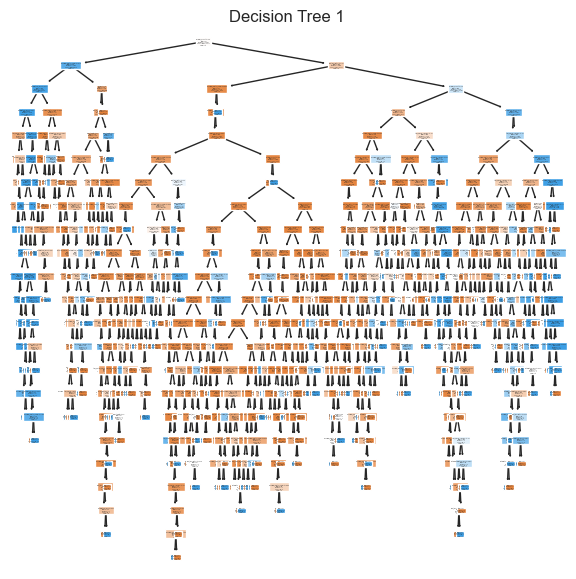

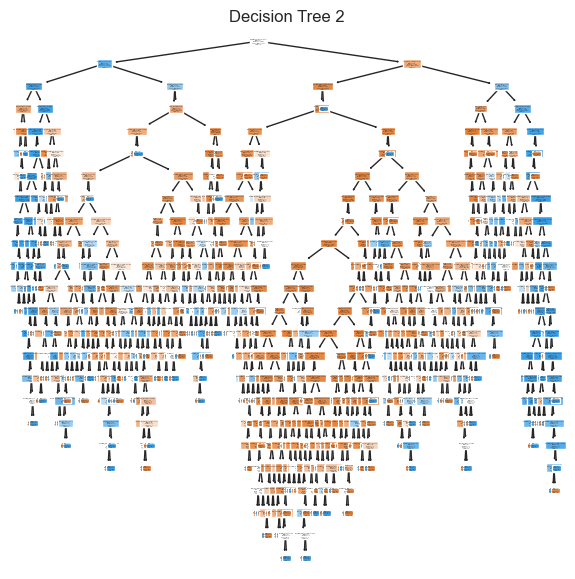

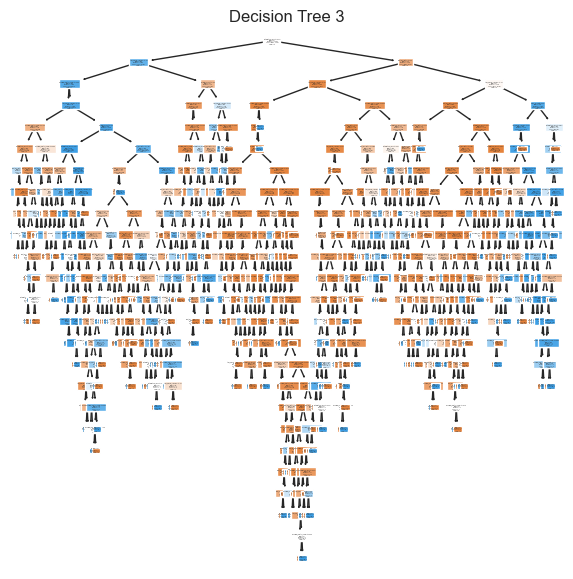

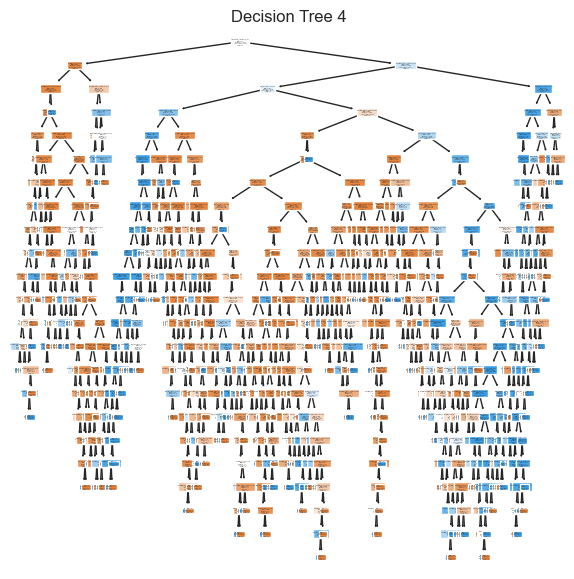

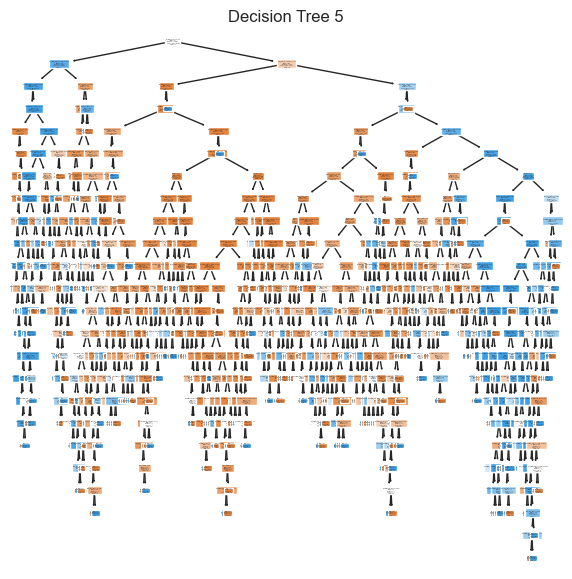

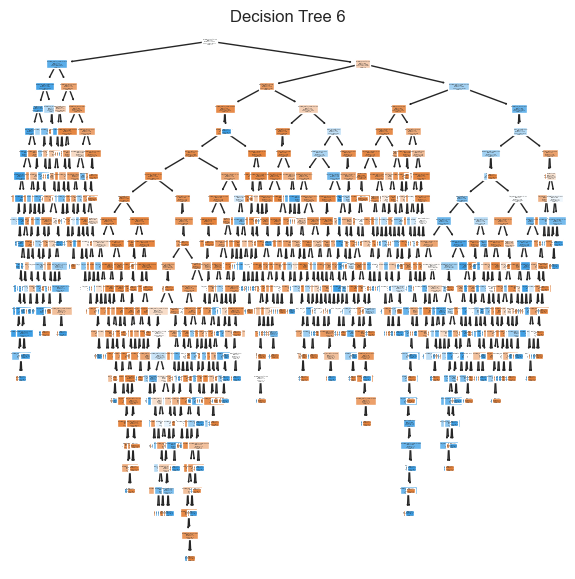

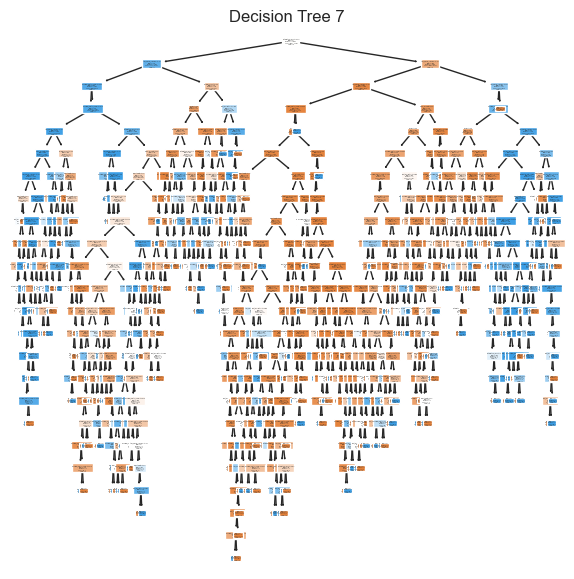

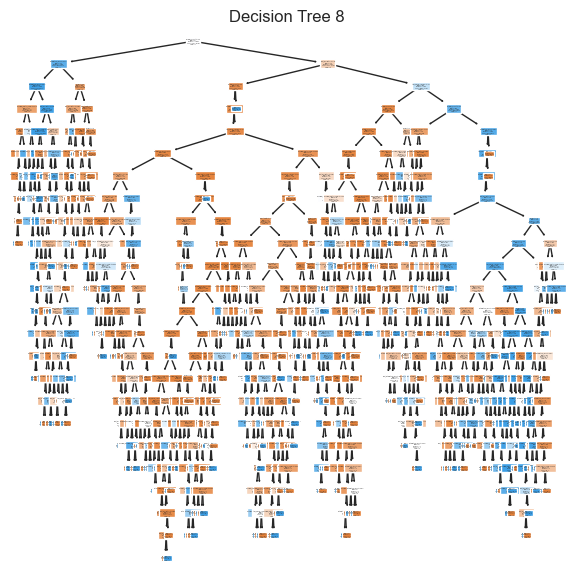

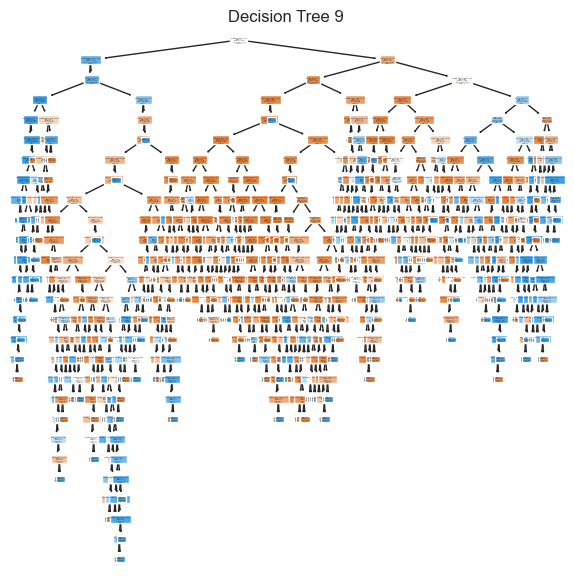

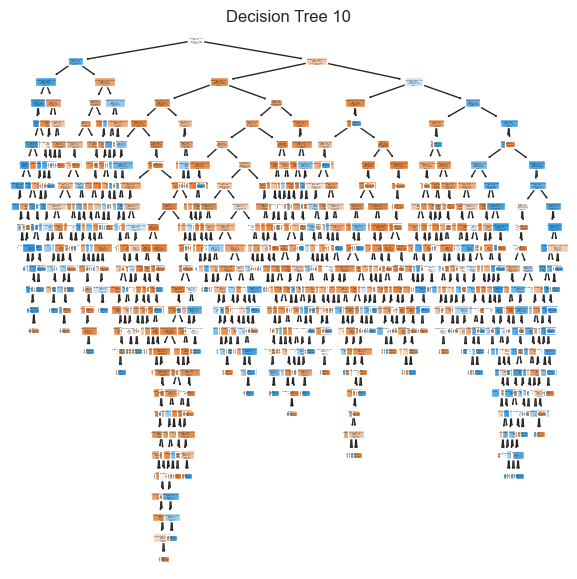

In [ ]:
from sklearn import tree

# Mendapatkan daftar estimator dari model Random Forest
estimators = model.estimators_

# Visualisasi setiap pohon dalam Random Forest
for i in range(len(estimators)):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    tree.plot_tree(estimators[i], feature_names=X_train.columns, class_names=["0", "1"], filled=True)
    plt.title('Decision Tree {}'.format(i+1))
    plt.show()


## Confussion Matrix

In [ ]:
pd.DataFrame(
    confusion_matrix(y_test, labels_predict),
    columns=['Predicted Not Left', 'Predicted Left'],
    index=['True No Left', 'True Left']
)

,Predicted Not Left,Predicted Left
True No Left,3381,17
True Left,111,3348
